In [1]:
%pylab inline
from glob import glob
import pickle as pk

from os import system
from glob import glob
import pickle as pk
import numpy as np
from os.path import isdir

def pad_patch(patch):
    too_big=True
    size=patch.shape[0]
    for sz_block in size_tresholds:
        if size<sz_block:
            too_big=False
            break
    if too_big:
        return None,size

    pad=np.zeros([sz_block,sz_block],dtype=np.float16)
    _from=int((sz_block-size)/2)
    _to = int(sz_block-_from)
    # print(size,sz_block,_from,_to)
    pad[_from:_to,_from:_to]=patch
    return pad,sz_block
    
def extract_vectors():
    Vec_dict={}
    for sz in size_tresholds:
        Vec_dict[sz]=[]
    
    for filename in glob('%s/tiles/*extracted*'%local_data):
        #print('filename=',filename)
        D=pk.load(open(filename,'rb'))
        for e in D:
            patch=np.array(e['normalized_patch'],dtype=np.float16)
            padded,sz=pad_patch(patch)
            if not padded is None:
                Vec_dict[sz].append(padded)
    #return a dict of arrays partitioned according to size.
    return Vec_dict

def run(cmd):
    print('cmd=',cmd)
    return system(cmd)

Populating the interactive namespace from numpy and matplotlib


In [234]:
local_data='/dev/shm/data'
exec_dir='/home/ubuntu/shapeology_code/scripts'
stack='s3://mousebraindata-open/MD657/'
size_tresholds=[15,27,51,81,151,201]
files=!aws s3 ls $_dir | grep lossless_patches | grep "\-N"
files[:3]

['2018-12-23 05:09:29   66288806 MD657-N1-2017.02.27-15.52.27_MD657_1_0001_lossless_patches.tgz',
 '2018-12-23 01:55:05   78938048 MD657-N1-2017.02.27-15.52.27_MD657_2_0002_lossless_patches.tgz',
 '2018-12-23 01:53:30   89508969 MD657-N1-2017.02.27-15.52.27_MD657_3_0003_lossless_patches.tgz']

In [238]:
i=0
f=0
N=0
total_MB=0
for line in files:
    ALL_V={}
    patch_file=line.split()[-1]
    #print('file=',patch_file)
    run('rm %s/tiles/*'%local_data)
    run('aws s3 cp %s%s %s/%s'%(stack,patch_file,local_data,patch_file))
    !ls -l $local_data/$patch_file
    run('tar xzvf %s/%s -C /'%(local_data,patch_file))
    if isdir(local_data+'/tiles/dev'):
        print('moving from dev')
        run('mv {0}/tiles/dev/shm/data/tiles/ {0}/tmp_tiles/'.format(local_data))
        run('rm -rf {0}/tiles/'.format(local_data))
        run('mv {0}/tmp_tiles/ {0}/tiles/'.format(local_data))
    V=extract_vectors()
    for sz in size_tresholds:
        if len(V[sz])>0:
            Array=np.array(V[sz],dtype=float16)
            print(sz,Array.shape)
            if not sz in ALL_V:
                ALL_V[sz]=Array
            else:
                ALL_V[sz]=concatenate([ALL_V[sz],Array])
    pk.dump(ALL_V,open(local_data+'/'+patch_file+'.pkl','wb'))

cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N1-2017.02.27-15.52.27_MD657_1_0001_lossless_patches.tgz /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_1_0001_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 66288806 Dec 23 05:09 /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_1_0001_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_1_0001_lossless_patches.tgz -C /
15 (4139, 15, 15)
27 (6278, 27, 27)
51 (7492, 51, 51)
81 (1982, 81, 81)
151 (483, 151, 151)
201 (32, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N1-2017.02.27-15.52.27_MD657_2_0002_lossless_patches.tgz /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_2_0002_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 78938048 Dec 23 01:55 /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_2_0002_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N1-2017.02.27-15.52.27_MD657_2_0002_lossless_patches.tgz -C /
15 (5552, 15,

15 (35478, 15, 15)
27 (46237, 27, 27)
51 (52177, 51, 51)
81 (18642, 81, 81)
151 (4801, 151, 151)
201 (368, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N15-2017.02.22-14.41.51_MD657_3_0045_lossless_patches.tgz /dev/shm/data/MD657-N15-2017.02.22-14.41.51_MD657_3_0045_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 550394974 Dec 23 05:26 /dev/shm/data/MD657-N15-2017.02.22-14.41.51_MD657_3_0045_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N15-2017.02.22-14.41.51_MD657_3_0045_lossless_patches.tgz -C /
15 (32196, 15, 15)
27 (46318, 27, 27)
51 (53277, 51, 51)
81 (18809, 81, 81)
151 (4765, 151, 151)
201 (368, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N16-2017.02.27-16.09.46_MD657_1_0046_lossless_patches.tgz /dev/shm/data/MD657-N16-2017.02.27-16.09.46_MD657_1_0046_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 554556076 Dec 23 01:26 /dev/shm/data/MD657-N16-2017.02.27-16.09.46_MD657_1_004

cmd= tar xzvf /dev/shm/data/MD657-N2-2017.02.22-13.45.24_MD657_2_0005_lossless_patches.tgz -C /
15 (8482, 15, 15)
27 (10071, 27, 27)
51 (13731, 51, 51)
81 (4653, 81, 81)
151 (1175, 151, 151)
201 (71, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N2-2017.02.22-13.45.24_MD657_3_0006_lossless_patches.tgz /dev/shm/data/MD657-N2-2017.02.22-13.45.24_MD657_3_0006_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 147446344 Dec 23 06:14 /dev/shm/data/MD657-N2-2017.02.22-13.45.24_MD657_3_0006_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N2-2017.02.22-13.45.24_MD657_3_0006_lossless_patches.tgz -C /
15 (8843, 15, 15)
27 (11104, 27, 27)
51 (14987, 51, 51)
81 (5257, 81, 81)
151 (1311, 151, 151)
201 (66, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N20-2017.02.22-14.59.13_MD657_1_0058_lossless_patches.tgz /dev/shm/data/MD657-N20-2017.02.22-14.59.13_MD657_1_0058_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu

-rw-rw-r-- 1 ubuntu ubuntu 686380398 Dec 23 03:03 /dev/shm/data/MD657-N26-2017.02.27-16.14.53_MD657_3_0078_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N26-2017.02.27-16.14.53_MD657_3_0078_lossless_patches.tgz -C /
15 (42332, 15, 15)
27 (76532, 27, 27)
51 (75086, 51, 51)
81 (23897, 81, 81)
151 (5461, 151, 151)
201 (339, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N27-2017.02.22-15.18.34_MD657_1_0079_lossless_patches.tgz /dev/shm/data/MD657-N27-2017.02.22-15.18.34_MD657_1_0079_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 97184972 Dec 23 05:22 /dev/shm/data/MD657-N27-2017.02.22-15.18.34_MD657_1_0079_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N27-2017.02.22-15.18.34_MD657_1_0079_lossless_patches.tgz -C /
15 (11983, 15, 15)
27 (11819, 27, 27)
51 (11000, 51, 51)
81 (3151, 81, 81)
151 (872, 151, 151)
201 (56, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N27-2017.02.22-15.18

-rw-rw-r-- 1 ubuntu ubuntu 805225885 Dec 23 06:03 /dev/shm/data/MD657-N32-2017.02.22-15.36.09_MD657_2_0095_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N32-2017.02.22-15.36.09_MD657_2_0095_lossless_patches.tgz -C /
15 (49430, 15, 15)
27 (82681, 27, 27)
51 (83053, 51, 51)
81 (26679, 81, 81)
151 (6725, 151, 151)
201 (531, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N33-2017.02.22-15.39.59_MD657_1_0097_lossless_patches.tgz /dev/shm/data/MD657-N33-2017.02.22-15.39.59_MD657_1_0097_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 853755609 Dec 23 03:03 /dev/shm/data/MD657-N33-2017.02.22-15.39.59_MD657_1_0097_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N33-2017.02.22-15.39.59_MD657_1_0097_lossless_patches.tgz -C /
15 (52361, 15, 15)
27 (82500, 27, 27)
51 (85729, 51, 51)
81 (28819, 81, 81)
151 (7488, 151, 151)
201 (548, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N33-2017.02.22-1

cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N4-2017.02.27-15.56.07_MD657_1_0010_lossless_patches.tgz /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_1_0010_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 204648349 Dec 23 04:36 /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_1_0010_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_1_0010_lossless_patches.tgz -C /
15 (13250, 15, 15)
27 (17088, 27, 27)
51 (21041, 51, 51)
81 (7365, 81, 81)
151 (1613, 151, 151)
201 (102, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N4-2017.02.27-15.56.07_MD657_2_0011_lossless_patches.tgz /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_2_0011_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 212171249 Dec 23 04:24 /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_2_0011_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N4-2017.02.27-15.56.07_MD657_2_0011_lossless_patches.tgz -C /
15 (13817, 15, 15)
27 (17178, 27, 27

15 (61648, 15, 15)
27 (96476, 27, 27)
51 (97588, 51, 51)
81 (35880, 81, 81)
151 (10407, 151, 151)
201 (674, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N46-2017.02.22-16.33.47_MD657_1_0136_lossless_patches.tgz /dev/shm/data/MD657-N46-2017.02.22-16.33.47_MD657_1_0136_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 1081566924 Dec 23 02:20 /dev/shm/data/MD657-N46-2017.02.22-16.33.47_MD657_1_0136_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N46-2017.02.22-16.33.47_MD657_1_0136_lossless_patches.tgz -C /
15 (59579, 15, 15)
27 (99861, 27, 27)
51 (102561, 51, 51)
81 (38308, 81, 81)
151 (11495, 151, 151)
201 (731, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N46-2017.02.22-16.33.47_MD657_2_0137_lossless_patches.tgz /dev/shm/data/MD657-N46-2017.02.22-16.33.47_MD657_2_0137_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 1043844306 Dec 23 03:46 /dev/shm/data/MD657-N46-2017.02.22-16.33.47_MD657_

cmd= tar xzvf /dev/shm/data/MD657-N51-2017.02.22-16.54.20_MD657_2_0152_lossless_patches.tgz -C /
15 (58481, 15, 15)
27 (89824, 27, 27)
51 (93869, 51, 51)
81 (31669, 81, 81)
151 (9248, 151, 151)
201 (720, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N52-2017.02.22-16.58.50_MD657_1_0154_lossless_patches.tgz /dev/shm/data/MD657-N52-2017.02.22-16.58.50_MD657_1_0154_lossless_patches.tgz
-rw-rw-r-- 1 ubuntu ubuntu 1002627841 Dec 23 05:10 /dev/shm/data/MD657-N52-2017.02.22-16.58.50_MD657_1_0154_lossless_patches.tgz
cmd= tar xzvf /dev/shm/data/MD657-N52-2017.02.22-16.58.50_MD657_1_0154_lossless_patches.tgz -C /
15 (68010, 15, 15)
27 (93161, 27, 27)
51 (94736, 51, 51)
81 (32924, 81, 81)
151 (10095, 151, 151)
201 (712, 201, 201)
cmd= rm /dev/shm/data/tiles/*
cmd= aws s3 cp s3://mousebraindata-open/MD657/MD657-N52-2017.02.22-16.58.50_MD657_2_0155_lossless_patches.tgz /dev/shm/data/MD657-N52-2017.02.22-16.58.50_MD657_2_0155_lossless_patches.tgz
-rw-rw

OSError: [Errno 28] No space left on device

In [243]:
[(k,ALL_V[k].shape) for k in ALL_V.keys()]

NameError: name 'ALL_V' is not defined

In [ ]:
def plot_patches(fig,data,h=15,w=15,_titles=[]):
    for i in range(h*w):
        if i>=data.shape[0]:
            break
        ax=fig.add_subplot(h,w,i+1);
        pic=np.array(data[i,:,:],dtype=np.float32)

        subfig=ax.imshow(pic,cmap='gray')
        if(len(_titles)>i):
            plt.title(_titles[i])
        subfig.axes.get_xaxis().set_visible(False)
        subfig.axes.get_yaxis().set_visible(False)

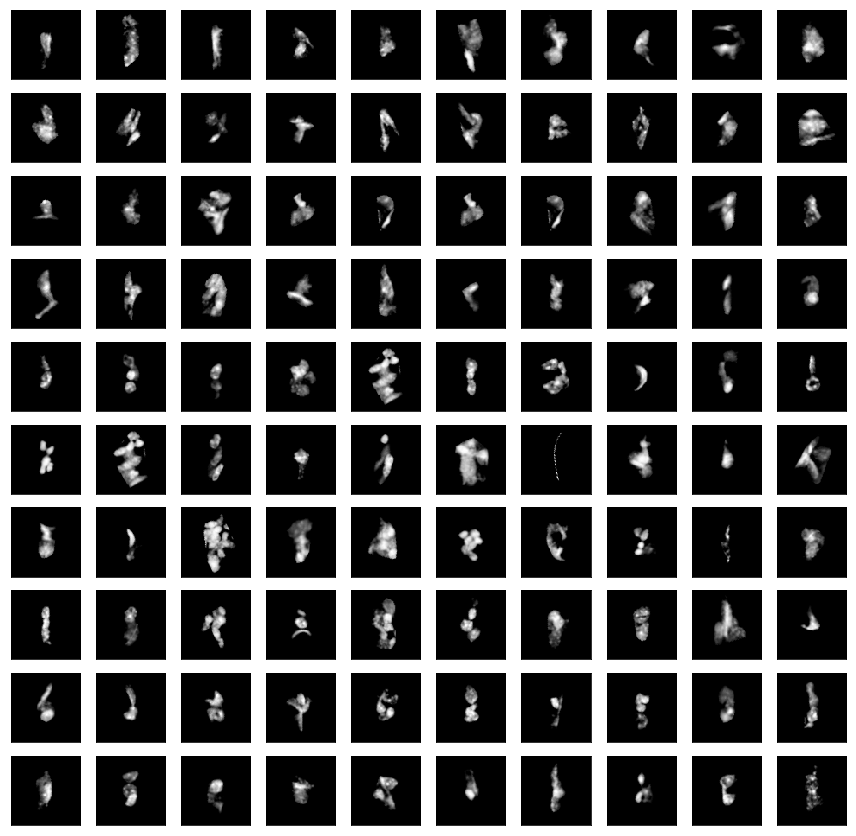

In [228]:
fig=figure(figsize=(15,15))
plot_patches(fig,ALL_V[81][0:,:,:],h=10,w=10)